In [36]:
# Step 1 - Load Data
import pandas as pd
dataset = pd.read_csv("/home/administrator/Downloads/DataSet/Position_Salaries.csv")
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [37]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [38]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [40]:
# Step 2 - Feature Scalingfrom sklearn.svm import SVR
# ** NOTE - SVR does not do feature scaling
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
ss_y = StandardScaler()
X_scaled = ss_x.fit_transform(X)
y_scaled = ss_y.fit_transform(y.reshape(-1,1))

In [41]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [42]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [43]:
# Step 3 - Fit SVR
from sklearn.svm import SVR
svr_regressor = SVR(kernel="rbf")
svr_regressor.fit(X_scaled, y_scaled)

/home/administrator/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

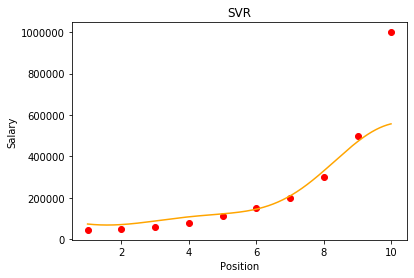

In [47]:
# Step 4 - Visualization
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X, y , color="red")
plt.plot(X_grid, ss_y.inverse_transform(svr_regressor.predict(ss_x.transform(X_grid))), color="orange")
plt.title("SVR")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

In [45]:
import numpy as np
# Predict - since we did feature scaling -
# So have to scale/transform 6.5 also
position_val = ss_x.transform([[6.5]])
pred_val_scaled = svr_regressor.predict(position_val)
# The above statement will return scaled predicted value
# So have to convert that using inverse transform
svr_pred = ss_y.inverse_transform(pred_val_scaled)
print('The predicted salary of a person at 6.5 Level with Support Vector Regression is ',svr_pred)

The predicted salary of a person at 6.5 Level with Support Vector Regression is  [170370.0204065]
